In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!pip install yellowbrick==1.4 scikit-learn==1.0.2 # Lembre-se de reiniciar o ambiente

In [67]:
import os
import numpy as np
import pandas as pd

In [68]:
workdir = '/content/drive/MyDrive/datasets'
datadir = os.path.join(workdir, 'olist')

# Carregando os Dados

In [69]:
df_orders = pd.read_csv(os.path.join(datadir, 'olist_orders_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(datadir, 'olist_order_items_dataset.csv'))
df_products = pd.read_csv(os.path.join(datadir, 'olist_products_dataset.csv'))

In [70]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [71]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [72]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Clusterizando por Categorias: Criando a ABT

In [73]:
# join da tabela de items com a tabela de produtos
df_joined = df_order_items.merge(df_products, how='inner', on='product_id')

In [74]:
# pivoteando a tabela para saber a quantidade percentual dentro de cada categoria que cada seller vendeu
abt = pd.crosstab(df_joined['seller_id'], df_joined['product_category_name'], normalize='index').reset_index()

In [75]:
# salvando apenas para eliminar o index indesejado
abt.to_csv(os.path.join(datadir, 'abt_segmentacao_sellers_categorias.csv'), index=False)

In [76]:
# lendo a tabela salva
df = pd.read_csv(os.path.join(datadir, 'abt_segmentacao_sellers_categorias.csv'))
df.head()

,seller_id,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001e6ad469a905060d959994f1b41e4f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
X = df.drop('seller_id', axis=1).copy()
X.head()

,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clustering com KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

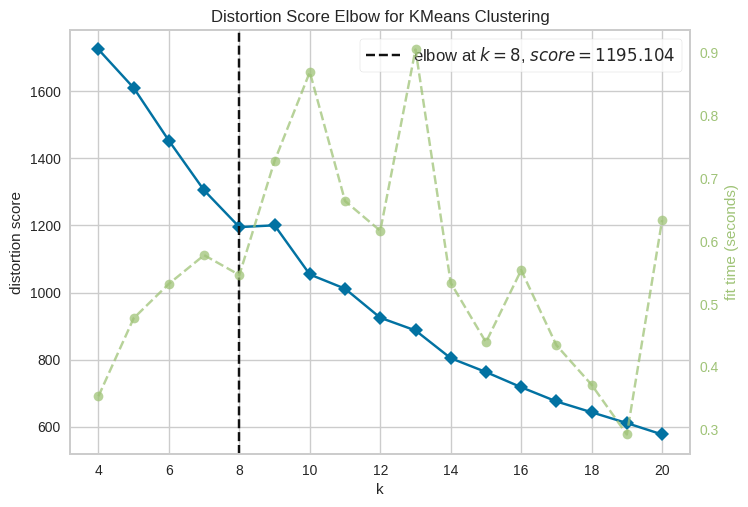

In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4, 21))
visualizer.fit(X)
visualizer.show();

In [79]:
kmeans = KMeans(n_clusters=13, random_state=15)
kmeans.fit(X)
df['cluster_id'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
df.head()

,seller_id,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,...,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,cluster_id
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,001e6ad469a905060d959994f1b41e4f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


## Mapa de calor

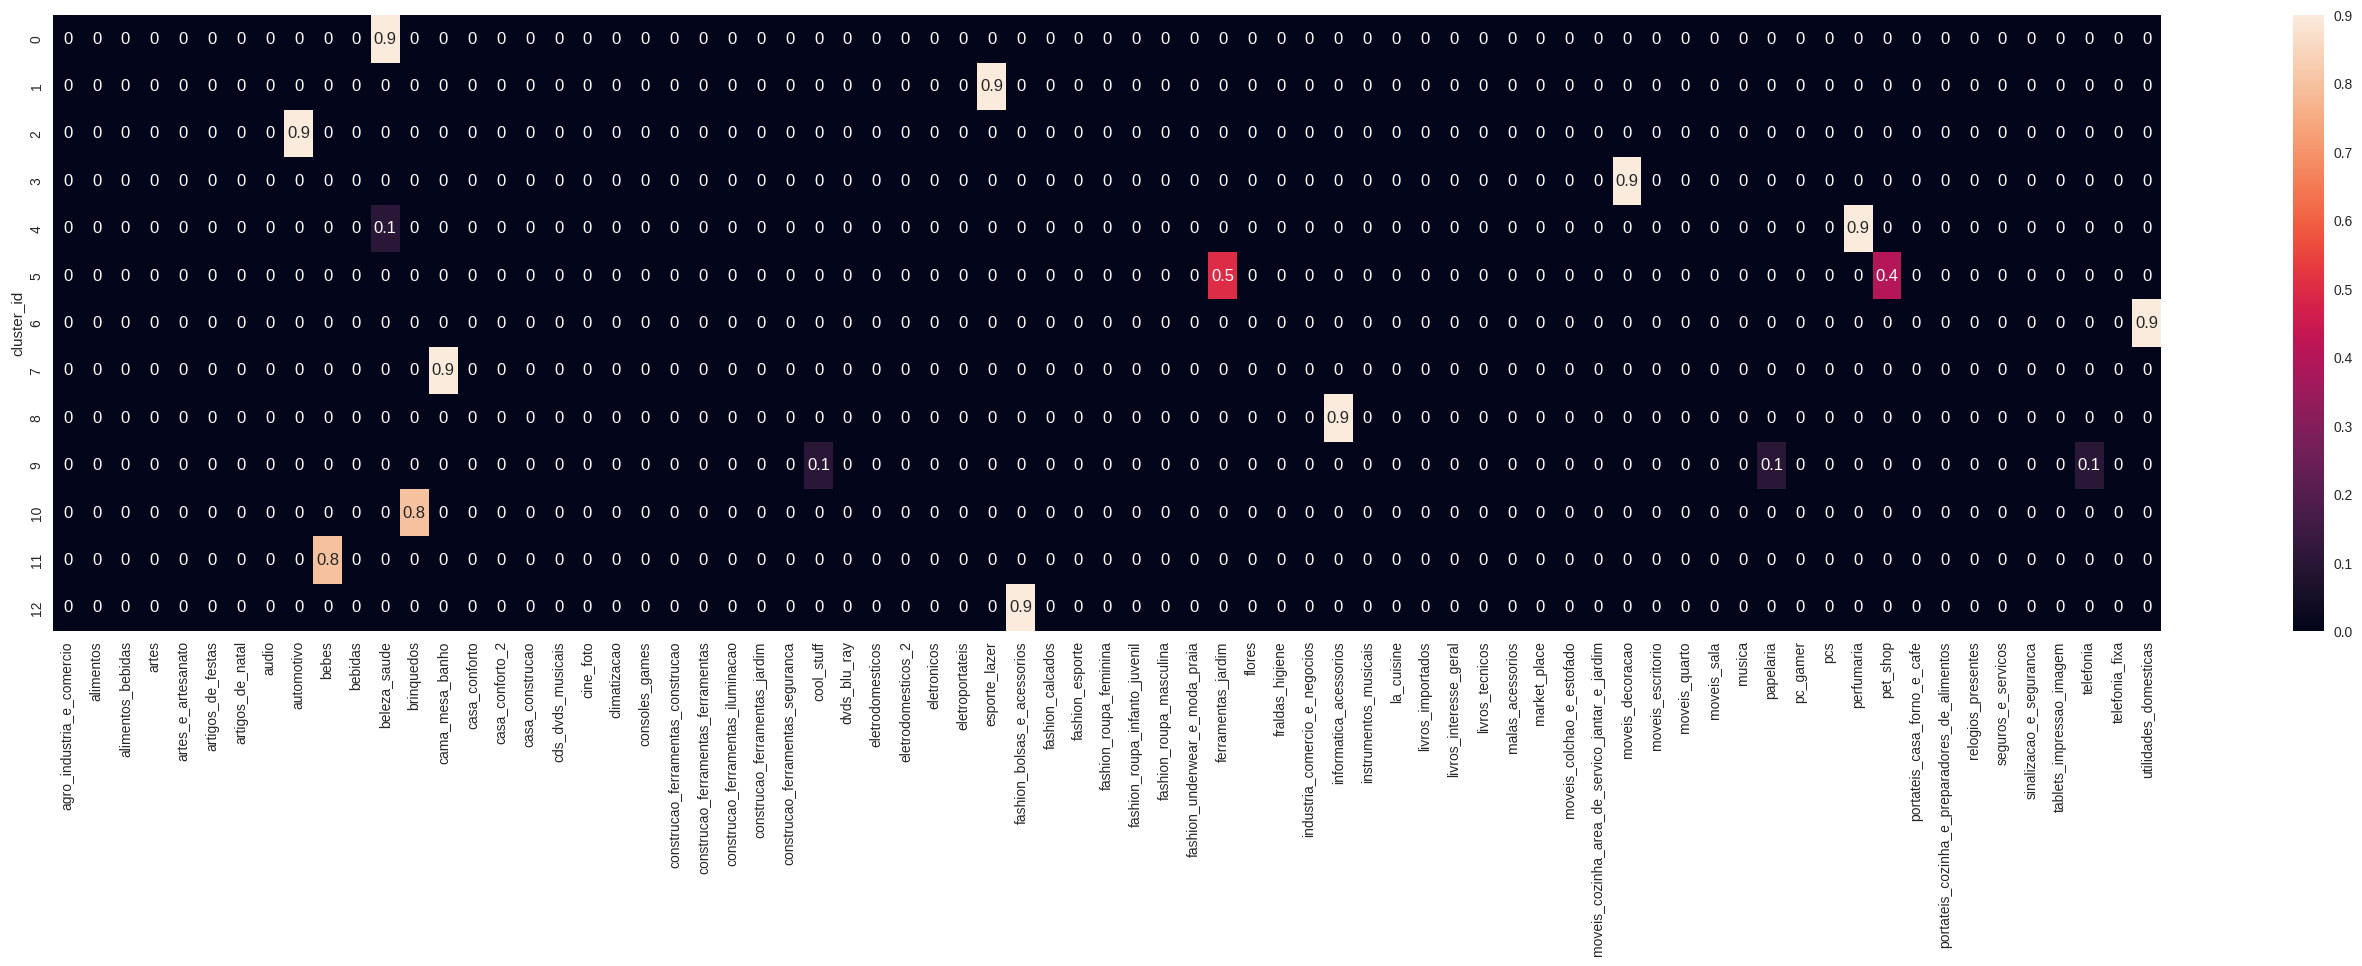

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(34, 8))
sns.heatmap(X.groupby(df['cluster_id']).mean().round(1), annot=True);

# Surrougate Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, df['cluster_id'])

DecisionTreeClassifier()

In [83]:
top_features = pd.Series(clf.feature_importances_, index=X.columns.tolist()).sort_values(ascending=False).head(14).index.tolist()

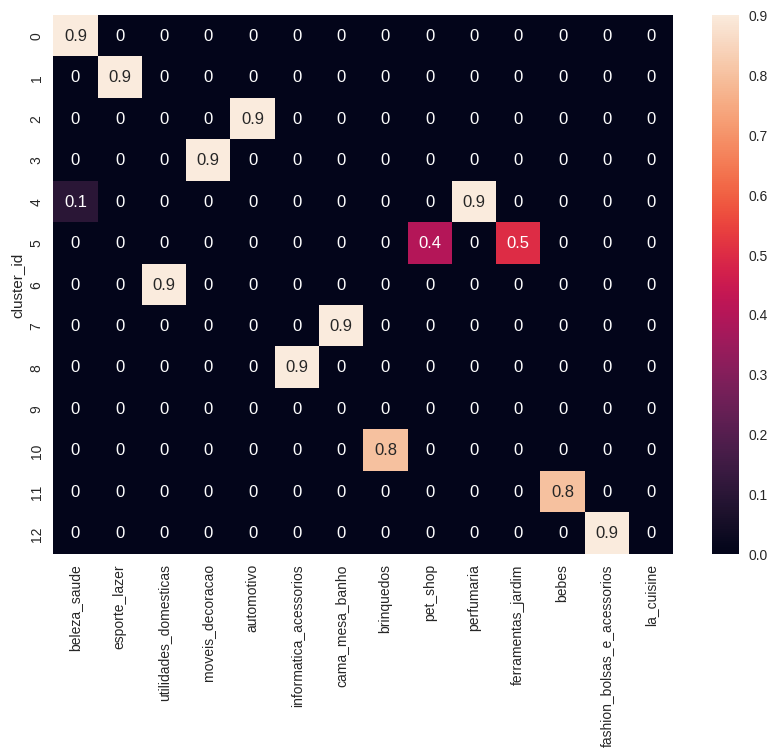

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(X.groupby(df['cluster_id'])[top_features].mean().round(1), annot=True);

# Clusterização por Receita versus Frequência Vendas

In [85]:
df_abt_rf = (
    df_order_items
    .merge(df_orders, on='order_id', how='left')
    .filter(['order_id', 'seller_id', 'price'])
    .groupby('seller_id')
    .agg(
        receita = ('price', 'sum'),
        frequencia_vendas = ('order_id', 'nunique')
    ).reset_index())

df_abt_rf.head()

,seller_id,receita,frequencia_vendas
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,200
2,001e6ad469a905060d959994f1b41e4f,250.00,1
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,51
4,003554e2dce176b5555353e4f3555ac8,120.00,1


In [86]:
df_abt_rf['rank_pct_receita'] = df_abt_rf['receita'].rank(pct=True)
df_abt_rf['rank_pct_vendas'] = df_abt_rf['frequencia_vendas'].rank(pct=True)

In [87]:
df_abt_rf.head()

,seller_id,receita,frequencia_vendas,rank_pct_receita,rank_pct_vendas
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,0.716640,0.334249
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,200,0.967690,0.971082
2,001e6ad469a905060d959994f1b41e4f,250.00,1,0.276252,0.092407
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,51,0.580937,0.865267
4,003554e2dce176b5555353e4f3555ac8,120.00,1,0.156220,0.092407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

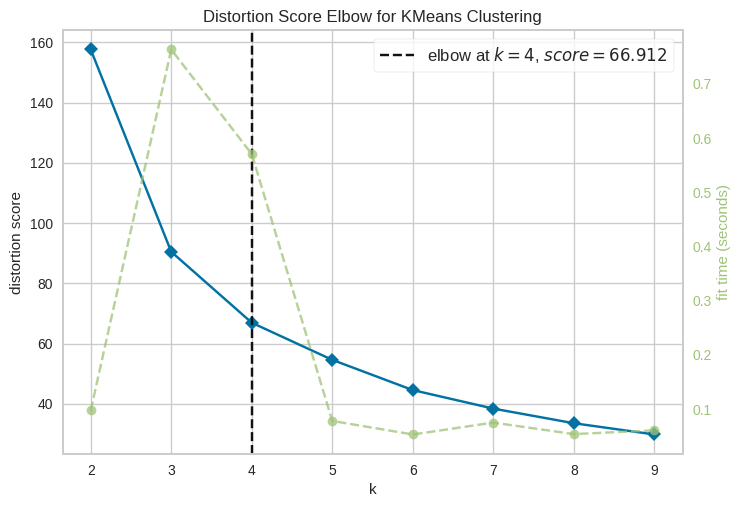

In [88]:
X_abt_fv = df_abt_rf[['rank_pct_receita', 'rank_pct_vendas']].copy()

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_abt_fv)
visualizer.show();

In [89]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_abt_fv)
df_abt_rf['cluster_id'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


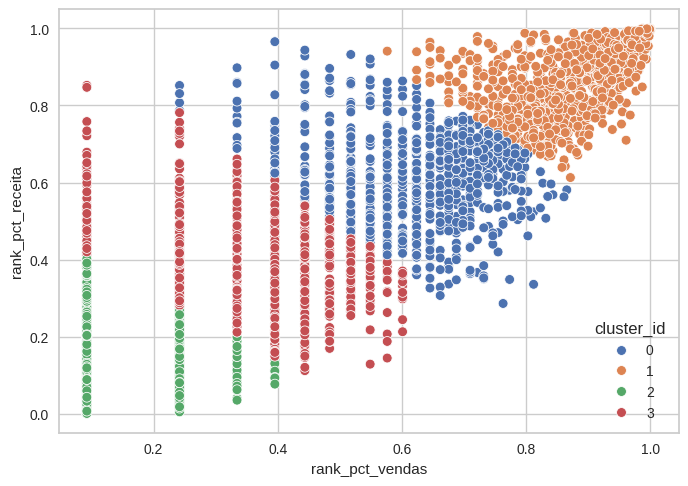

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_abt_rf, x='rank_pct_vendas', y='rank_pct_receita', hue='cluster_id', s=50, palette='deep');

# Juntando tudo!

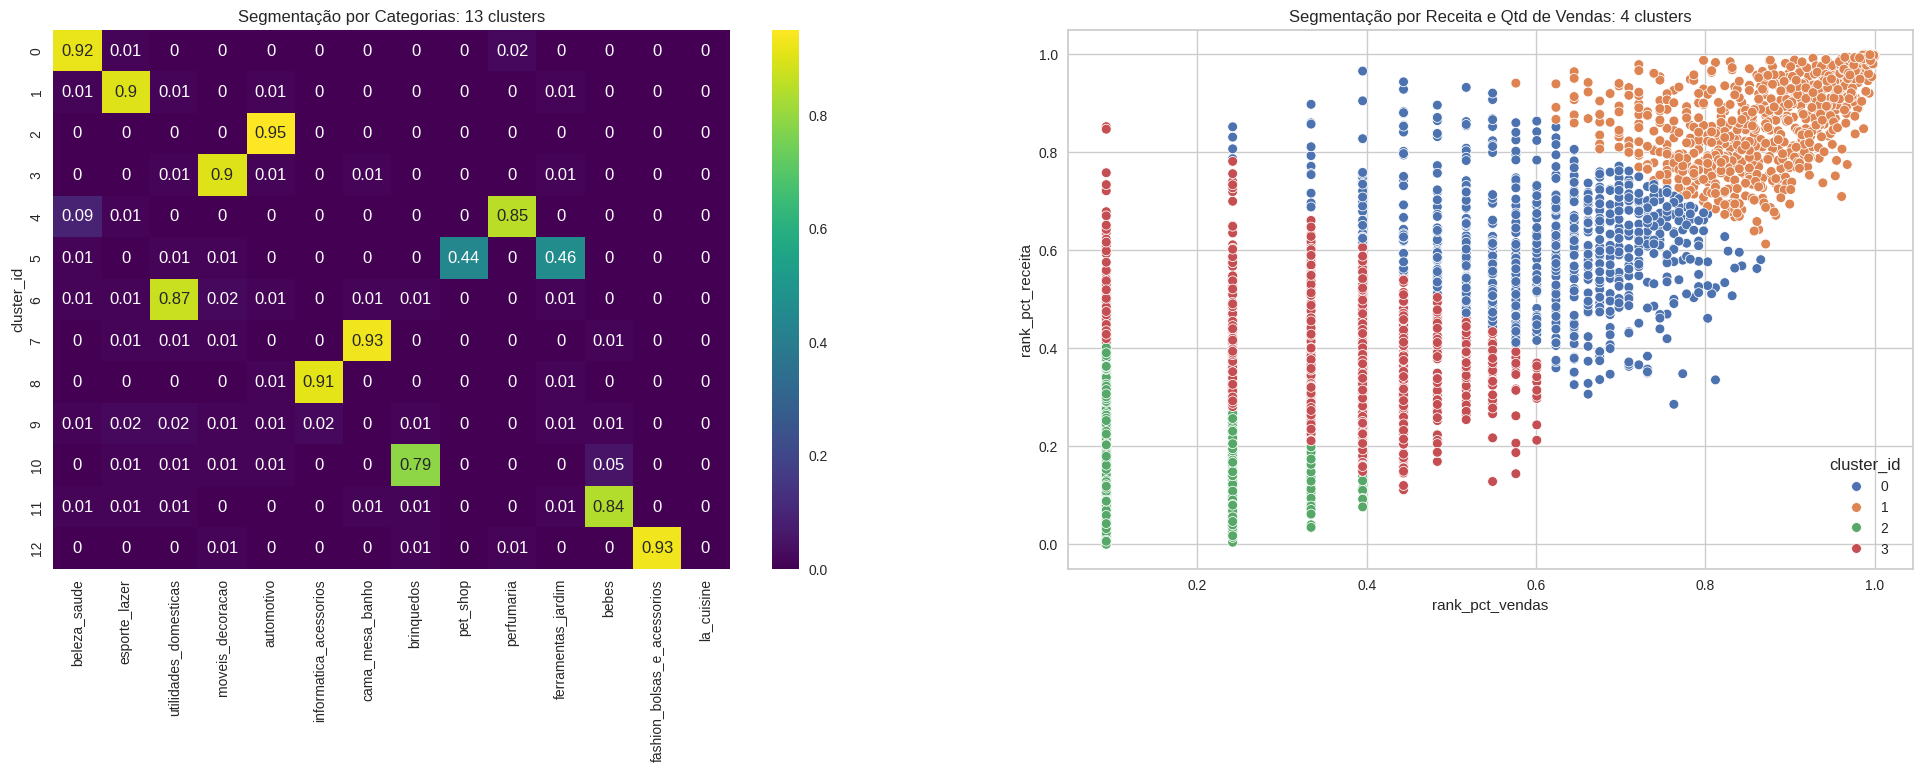

In [91]:
fig, ax = plt.subplots(figsize=(24, 7), nrows=1, ncols=2)

ax[0].set_title('Segmentação por Categorias: 13 clusters');
sns.heatmap(X.groupby(df['cluster_id'])[top_features].mean().round(2), ax=ax[0], cmap='viridis', annot=True);
ax[1].set_title('Segmentação por Receita e Qtd de Vendas: 4 clusters');
sns.scatterplot(data=df_abt_rf, x='rank_pct_vendas', y='rank_pct_receita', hue='cluster_id', s=50, palette='deep', ax=ax[1]);

In [92]:
df_clusters = (
    df
    .merge(df_abt_rf, on='seller_id', how='left')
    .rename(columns={'cluster_id_x': 'cluster_categorias',
                     'cluster_id_y': 'cluster_rf'})
    .filter(['seller_id', 'cluster_categorias', 'cluster_rf'])
)
df_clusters.head()

,seller_id,cluster_categorias,cluster_rf
0,0015a82c2db000af6aaaf3ae2ecb0532,9,0
1,001cca7ae9ae17fb1caed9dfb1094831,5,1
2,001e6ad469a905060d959994f1b41e4f,1,2
3,002100f778ceb8431b7a1020ff7ab48f,3,0
4,004c9cd9d87a3c30c522c48c4fc07416,7,1


In [93]:
df_clusters.query('cluster_categorias == 12').head(4)

,seller_id,cluster_categorias,cluster_rf
7,00d8b143d12632bad99c0ad66ad52825,12,2
156,0cbcee27c791afa0cdcb08587a2013a8,12,1
170,0ea22c1cfbdc755f86b9b54b39c16043,12,1
172,0ebd97a106433a45a4aebe57c1799778,12,1


In [94]:
df_clusters.query('cluster_categorias == 11').value_counts('cluster_rf', normalize=True)

cluster_rf
1    0.305263
2    0.305263
0    0.200000
3    0.189474
dtype: float64

Podemos ver que dentro do cluster que vende produtos de `bebe`, temos vendedores que possuem alta receita e alta frequência de vendas (`cluster_rf = 1`), bem como baixa receita e baixa frequência (`cluster_rf = 2`).